In [16]:
from matplotlib import pyplot as plt
%matplotlib widget

In [17]:
import numpy as np
import struct
#import casperfpga


# bram parameters - need to match our yellow block's values
block_size = 128     # <bram data_width>
# block_size = 32     # <bram data_width>
bram_addr_width = 13 # <bram address_width>
blocks = 2**bram_addr_width  # number of bram blocks
bits_per_val = 16 # <rfdc input data size> 16 bits for rfsoc4x2
# We need our output data size to match the bram's
# capacity so we don't fail on writes
num_vals = int(block_size / bits_per_val * blocks)

# sine wave parameters
# fs = 1966.08e6      # RFDC sampling frequency
# fs = 3932.16e6
# fs = 500e6
fs = 4000e6
# fs = 983.04e6
# fs = 500e6
# fs = 62.5e6
# fc = 175e6      # Carrier frequency
# fc = 100e6
# fc = 393e6
# fc = 393.216e6 * 2
# fc = 12.288e6 * 2
# fc = 12.5e6 * 2
fc = 250e6 * 2
# fc = 600e6
# fc = 200e6
dt = 1/fs           # Time length between samples
tau = dt * num_vals # Time length of bram

# Print useful info
print(f"bram_size = 2**{bram_addr_width}")
print(f"fs = {fs / 1e6} MHz")
print(f"fc = {fc / 1e6} MHz")

# Setup our array
t = np.arange(0,tau,dt)

# Generate our sine wave
# frequency fc
# range 0, 1
x = .05*(1+np.cos(2*np.pi* fc *t))
print(f'{x.shape=} before converting')
# print(np.where(x == .1))
# print(x[0], x[65440])
# x = x[0:65441]
# x = x[:161]
# x = np.tile(x, 16)
# print(x[0], x[-1])
# scale our function to use the whole DAC range
maxVal = 2**14-1
x *= maxVal
# set each value to a 16 bit integer, for DAC compatibility
x = np.round(np.short(x))
# Shift right, DAC is 14 bits
x <<= 2

# x = x[:1024]
#buf = x.tobytes()
# Save our array x as a set of bytes
buf = bytes()
for cnt, i in enumerate(x):
    if cnt == 0:
        print(struct.pack('>h',i))
     #   print(struct.pack('>L',i))
    buf += struct.pack('>h',i)
# buf2 = x.tobytes()
# print(buf[:10], buf2[:10])
# We're done!, we can now write buf to our
# bram. To make sure it exists, enter len(buf)
# in your ipython terminal
print(x.shape)

bram_size = 2**13
fs = 4000.0 MHz
fc = 500.0 MHz
x.shape=(65536,) before converting
b'\x19\x98'
(65536,)


In [18]:
(2**(13)/4)/162

12.641975308641975

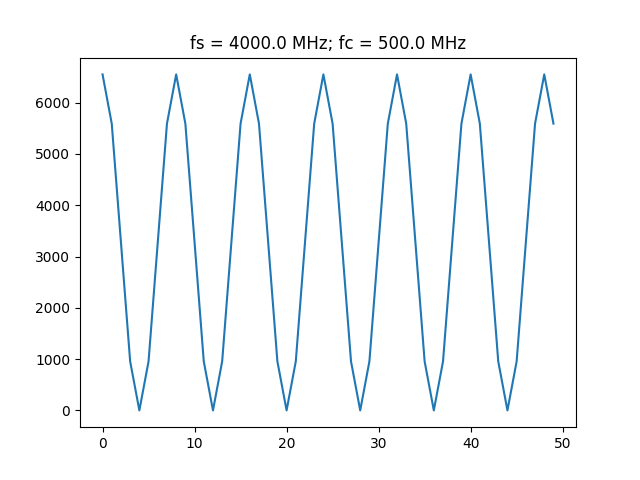

6552


131072

In [19]:
import matplotlib.pyplot as plt
plt.plot(np.ushort(x[:50]))
plt.title(f"fs = {fs / 1e6} MHz; fc = {fc / 1e6} MHz")
plt.show()
print(max(x))

# If needed we can save it as a file
# for later use or transferability
f = open("sine.txt", "bw")
f.write(buf)

In [20]:
print(num_vals)

65536


In [21]:
num_vals/2**(11)

32.0

In [22]:
# N = 64 #### Best
# N = 128 ### worked with aaron
N = 2**(9)
# N = 256
# N = 32
# N = 2**(11)
M = (N//2)-1

d_tilda = np.zeros(N) + 1j*np.zeros(N)
print(d_tilda.shape)


dM_tilda =   np.exp(1j*np.random.uniform(0, 2*np.pi, size=M))
conj_dM = np.conjugate(dM_tilda)[::-1]
print(dM_tilda.shape , conj_dM.shape)
print(d_tilda[1:M+1].shape)
d_tilda[1:M+1] = dM_tilda
d_tilda[-M:] = conj_dM

(512,)
(255,) (255,)
(255,)


(512,)


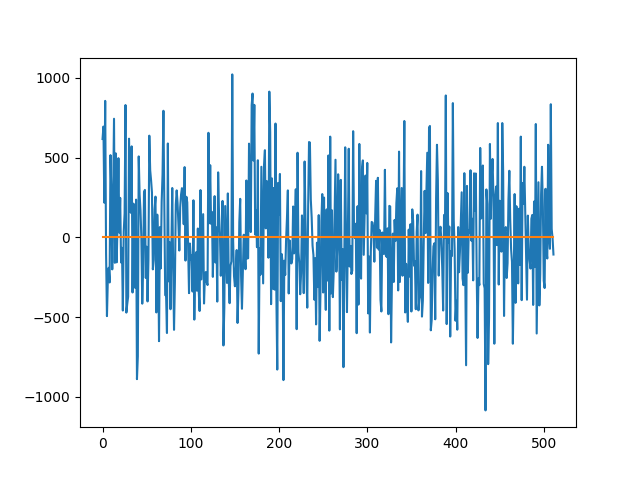

In [23]:
d = np.fft.ifft(d_tilda)
freq = np.fft.fftshift(np.fft.fftfreq(d_tilda.shape[0]))
print(d.shape)
d_back = np.fft.fft(d)
d_int = np.round((d*(2**13-1)))

plt.figure()
# plt.plot(d.real)
# plt.plot(d.imag)
plt.plot(d_int.real)
plt.plot(d_int.imag)
# plt.plot(freq, np.fft.fftshift(np.abs(d_tilda)))
# plt.plot(freq, np.fft.fftshift(np.abs(d_back)), linestyle='--')
# plt.plot(freq, np.abs(np.fft.fftshift(d_tilda)))
plt.show()

max spike 1.0000000000000007
(65536,)


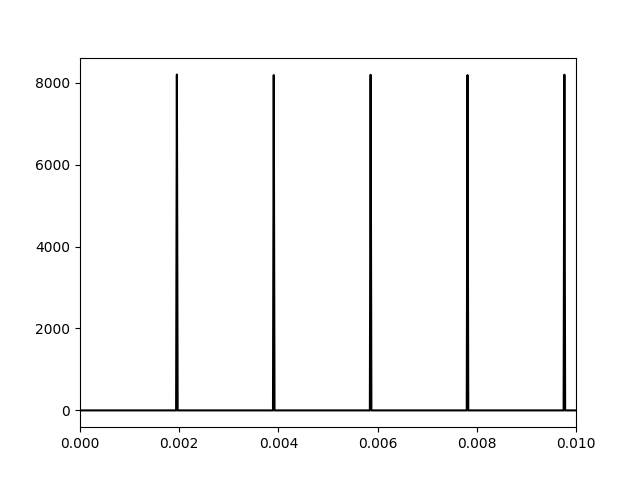

In [26]:
# T = 16
# T = 32
T = 2**(7)
# T = 8 ### Worked with aaron
index = T*2
start = index-T
repeat = np.tile(d.real, T)
int_repeat = np.tile(d_int.real, T)

# int_repeat = sqrt(int_repeat)

freqs = np.fft.fftfreq(repeat.size)


repeat_fft = np.fft.fft(repeat)/T 
int_repeat_fft = np.fft.fft(int_repeat)/T
print('max spike', np.max(np.abs((repeat_fft))))
print(int_repeat_fft.shape)

plt.figure()
# plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(np.abs(int_repeat_fft)), color='black')
plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(np.abs(int_repeat_fft)), color='black')
# plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(np.abs(repeat_fft)), color='black')
plt.xlim(0, .01)
plt.show()

max spike 1.0000000000000007
(1024,)


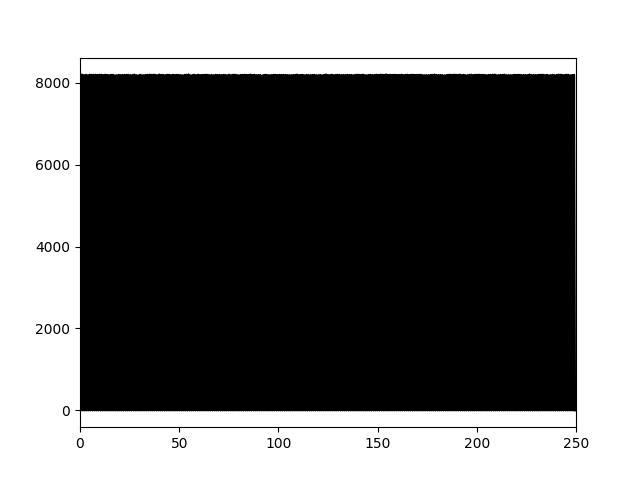

In [38]:
# T = 16
# T = 32
T = 2
# T = 8 ### Worked with aaron
repeat = np.tile(d.real, T)
int_repeat = np.tile(d_int.real, T)

# int_repeat = sqrt(int_repeat)

freqs = np.fft.fftfreq(repeat.size, 1/500)


repeat_fft = np.fft.fft(repeat)/T 
int_repeat_fft = np.fft.fft(int_repeat)/T
print('max spike', np.max(np.abs((repeat_fft))))
print(int_repeat_fft.shape)

plt.figure()
# plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(np.abs(int_repeat_fft)), color='black')
plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(np.abs(int_repeat_fft)), color='black')
# plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(np.abs(repeat_fft)), color='black')
plt.xlim(0, 250)
plt.show()

In [348]:
# pr = int_repeat
# int_repeat = np.round(np.short(int_repeat))


# int_repeat <<= 2

# pr = bytes()
# for cnt, i in enumerate(int_repeat.astype('int')):
#     if cnt == 0:
#         print(struct.pack('>h',i))
#      #   print(struct.pack('>L',i))
#     pr += struct.pack('>h',i)


maxVal = 2**14-1
repeat *= maxVal

repeat = np.round(np.short(repeat))

repeat <<= 2

pr = bytes()
for cnt, i in enumerate(repeat.astype('int')):
    if cnt == 0:
        print(struct.pack('>h',i))
     #   print(struct.pack('>L',i))
    pr += struct.pack('>h',i)

b'\xf9\xb8'


In [349]:
rfsoc.write('wf_bram_0', pr)

In [334]:
rfsoc.write_int('wf_en', 1)

In [192]:
len(buf)/2 == x.shape[0]

True

In [168]:
npz = np.load('d_int_32set256sam.npz')
sequence = npz['data']
data_array = sequence.astype('>i4')
data_bytes = data_array.tobytes()

# rfsoc.write_int('amp_reg', int(10))

rfsoc.write('wf_bram_0', data_bytes)

In [71]:
rfsoc.write('wf_bram_0', buf)

In [72]:
rfsoc.write_int('wf_en', 1)

In [73]:
2**(13) 
128*2

256

In [94]:
type(int_repeat[0])

numpy.int16

In [2]:
def spikes(n):
    N = 2**(n)
    M = (N//2)-1
    
    d_tilda = np.zeros(N) + 1j*np.zeros(N)
    print(d_tilda.shape)
    
    
    dM_tilda =   np.exp(1j*np.random.uniform(0, 2*np.pi, size=M))
    conj_dM = np.conjugate(dM_tilda)[::-1]
    print(dM_tilda.shape , conj_dM.shape)
    print(d_tilda[1:M+1].shape)
    d_tilda[1:M+1] = dM_tilda
    d_tilda[-M:] = conj_dM
    d = np.fft.ifft(d_tilda)
    m = 16 - n
    T = 2**(abs(m))
    repeat = np.tile(d.real, T)
    maxVal = 2**14-1
    repeat *= maxVal
    
    repeat = np.round(np.short(repeat))
    
    repeat <<= 2
    
    pr = bytes()
    for cnt, i in enumerate(repeat.astype('int')):
        if cnt == 0:
            print(struct.pack('>h',i))
         #   print(struct.pack('>L',i))
        pr += struct.pack('>h',i)
    return pr

In [3]:
N = 64 # NUmber of samples in the waveform, user defined
# N = 32
Nbits = 14
T = 16
# N = 128 ### worked with aaron


def gen_flat_spectrum_waveform(N=64, seed=0):
    """
    Return a waveform with hermitian spectrum with random phases and unity amplitude
    """
    M = (N//2)-1 # number of noise samples to draw
    
    d_tilda = np.zeros(N) + 1j*np.zeros(N)
    # print(d_tilda.shape)
    
    np.random.seed(seed)
    dM_tilda =   np.exp(1j*np.random.uniform(0, 2*np.pi, size=M))
    conj_dM = np.conjugate(dM_tilda)[::-1]
    # print(dM_tilda.shape , conj_dM.shape)
    # print(d_tilda[1:M+1].shape)
    d_tilda[1:M+1] = dM_tilda
    d_tilda[-M:] = conj_dM
    d = np.fft.ifft(d_tilda)
    return d.real

def round_waveform(d, nbits=14, scale=1.0):
    d_scale = scale * d.real / np.max(np.abs(d.real)) * (2**(nbits - 1) - 1)
    #d_int = np.floor(d_scale).astype(int)
    #remainder = d_scale - d_int
    #odd = d_int % 1
    #do_round = np.where(remainder > 0.5, 1, np.where(remainder < 0.5, 0, odd))
    #d_int += do_round
    d_int = np.round(d_scale)
    return d_int.astype(int)

def tile_waveform(d, T=16):
    d_repeat = np.tile(d, T)
    return d_repeat

def pack_waveform(d_repeat):
    d_pack = d_repeat * 4
    pr = struct.pack(f'>{d_pack.size}h', *d_pack)
    return pr

In [4]:
better_seed = 816343

d = gen_flat_spectrum_waveform(N, seed=better_seed)
d_back = np.fft.fft(d)
d_int = round_waveform(d, nbits=Nbits, scale=.9)
d_repeat = tile_waveform(d_int, T)
d_pack = pack_waveform(d_repeat)

NameError: name 'np' is not defined

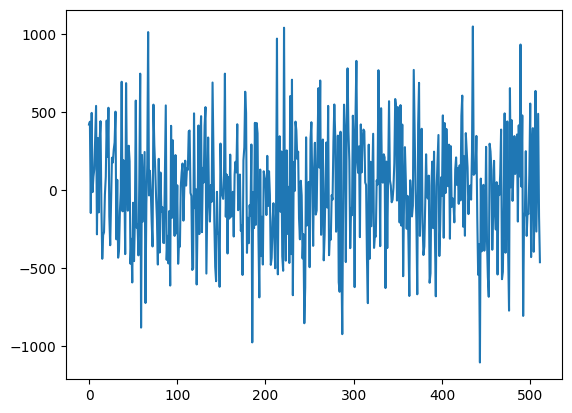

In [10]:
fig = plt.figure()

subfig = fig.add_subplot(111)

subfig.plot(d_int.real)

In [20]:
d_int2 = np.tile(d_int, 4)
dfft = np.fft.fft(d_int2.real)

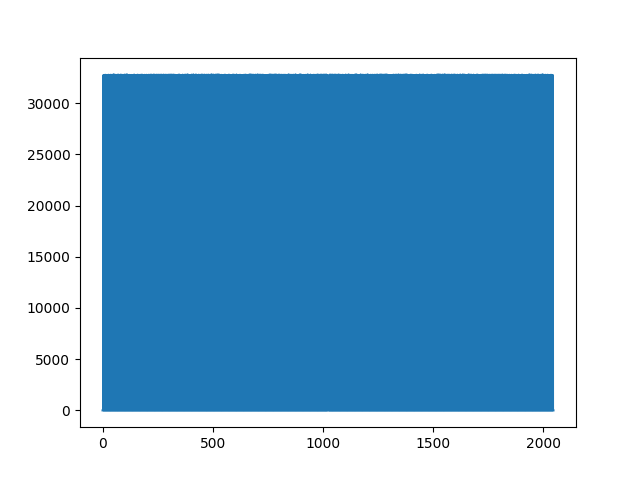

In [21]:
fig1 = plt.figure()
subfig1 = fig1.add_subplot(111)
subfig1.plot(abs(dfft))

In [11]:
aa=np.array([1,2,3,4])

In [12]:
aa

array([1, 2, 3, 4])

In [13]:
bb=np.tile(aa,2)

In [14]:
bb

array([1, 2, 3, 4, 1, 2, 3, 4])